Información sobre los tipos de datos y la presencia de valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB

Información estadísticas columnas numéricas:
       Temperature  Ice Cream Profits
count   365.000000         365.000000
mean     71.980822          52.103616
std      13.258510          15.989004
min      39.000000          11.880000
25%      63.000000          40.650000
50%      73.000000          53.620000
75%      82.000000          63.630000
max     101.000000          89.290000

Mostrando los 5 primeros valores del dataframe (5 primeras filas):
   Temperature  Ice Cream Profits
0           39              13.17
1           40              11.88
2           41            

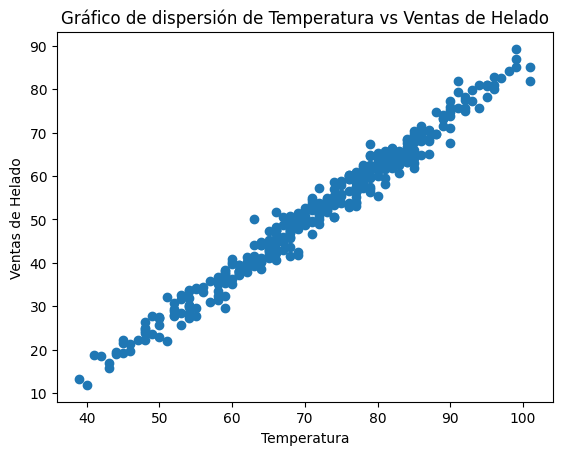

Coefficients: 
 [[0.00000000e+00 1.13418939e+00 3.32364418e-04]]
Mean squared error: 7.06
Coefficient of determination: 0.98


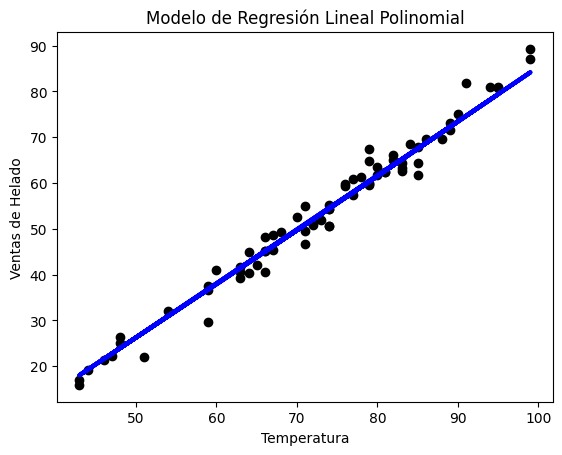

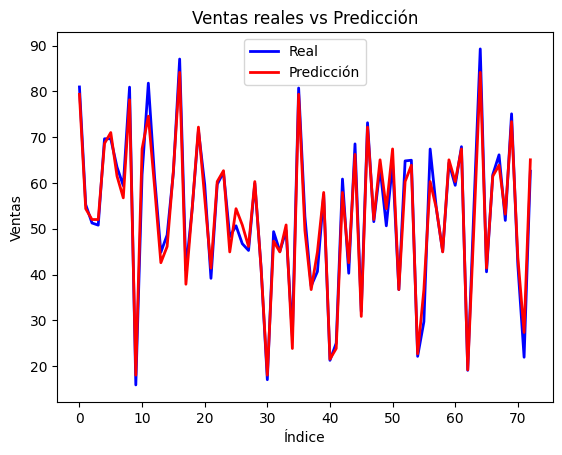

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Obtener datos
dataframe = pd.read_csv("/content/sample_data/Ice Cream Sales - temperatures.csv")

# Explorar datos
print("Información sobre los tipos de datos y la presencia de valores nulos:")
dataframe.info()

print("\nInformación estadísticas columnas numéricas:")
print(dataframe.describe())

print("\nMostrando los 5 primeros valores del dataframe (5 primeras filas):")
print(dataframe.head())

# Mostrar datos
features = ["Temperature"]
target = ["Ice Cream Profits"]

X = dataframe[features]
y = dataframe[target]

# Gráfico de Dispersión
plt.scatter(X, y)
plt.xlabel('Temperatura')
plt.ylabel('Ventas de Helado')
plt.title('Gráfico de dispersión de Temperatura vs Ventas de Helado')
plt.show()

# Separamos los datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Transformación de características a características polinomiales
poly = PolynomialFeatures(degree=2)  # Puedes ajustar el grado del polinomio
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entrenar el modelo de regresión lineal
linear_regression = LinearRegression()
linear_regression.fit(X_train_poly, y_train)

# Predecir los valores de y con los datos de test
y_sales_pred = linear_regression.predict(X_test_poly)

# Evaluación del modelo
print("Coefficients: \n", linear_regression.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_sales_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_sales_pred))

# Mostrar gráfico final
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_sales_pred, color="blue", linewidth=3)
plt.xlabel('Temperatura')
plt.ylabel('Ventas de Helado')
plt.title('Modelo de Regresión Lineal Polinomial')
plt.show()

# Mostrar la diferencia entre el resultado real y el predicho
plt.plot(y_test.values, color="blue", linewidth=2, linestyle="-", label="Real")
plt.plot(y_sales_pred, color="red",  linewidth=2, linestyle="-", label="Predicción")
plt.title('Ventas reales vs Predicción')
plt.xlabel('Índice')
plt.ylabel('Ventas')
plt.legend()
plt.show()